# **Part 3**

In [1]:
import pandas as pd
!gdown 1sHuWYSQSVWWhCx_Q1QMpg8PObhqSDJsN


Downloading...
From: https://drive.google.com/uc?id=1sHuWYSQSVWWhCx_Q1QMpg8PObhqSDJsN
To: /content/Housing.csv
100% 30.0k/30.0k [00:00<00:00, 39.2MB/s]


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
df = pd.read_csv("Housing.csv")

print(df.head().to_markdown(index=False))

|    price |   area |   bedrooms |   bathrooms |   stories | mainroad   | guestroom   | basement   | hotwaterheating   | airconditioning   |   parking | prefarea   | furnishingstatus   |
|---------:|-------:|-----------:|------------:|----------:|:-----------|:------------|:-----------|:------------------|:------------------|----------:|:-----------|:-------------------|
| 13300000 |   7420 |          4 |           2 |         3 | yes        | no          | no         | no                | yes               |         2 | yes        | furnished          |
| 12250000 |   8960 |          4 |           4 |         4 | yes        | no          | no         | no                | yes               |         3 | no         | furnished          |
| 12250000 |   9960 |          3 |           2 |         2 | yes        | no          | yes        | no                | no                |         2 | yes        | semi-furnished     |
| 12215000 |   7500 |          4 |           2 |         2 | yes 

In [4]:
# Numerical features (int64)
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()

# Categorical features (object)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")


Numerical features: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


/tmp/ipython-input-1800292047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)
/tmp/ipython-input-1800292047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)
/tmp/ipython-input-1800292047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)
/tmp/ipython-input-1800292047.py:7: FutureWarning: 

Passi

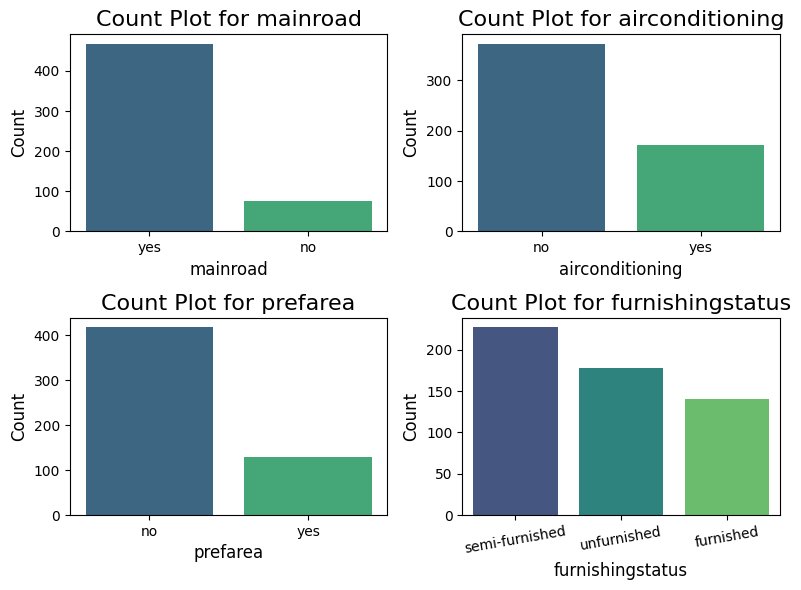

In [5]:
categorical_features_to_plot = ['mainroad', 'airconditioning', 'prefarea', 'furnishingstatus']

plt.figure(figsize=(8, 6))

for i, feature in enumerate(categorical_features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)
    plt.title(f'Count Plot for {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    if feature == 'furnishingstatus':
        plt.xticks(rotation=10)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3076852551.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True, bins=25, color='darkred')
/tmp/ipython-input-3076852551.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True, bins=25, color='darkred')
/tmp/ipython-input-3076852551.py:8

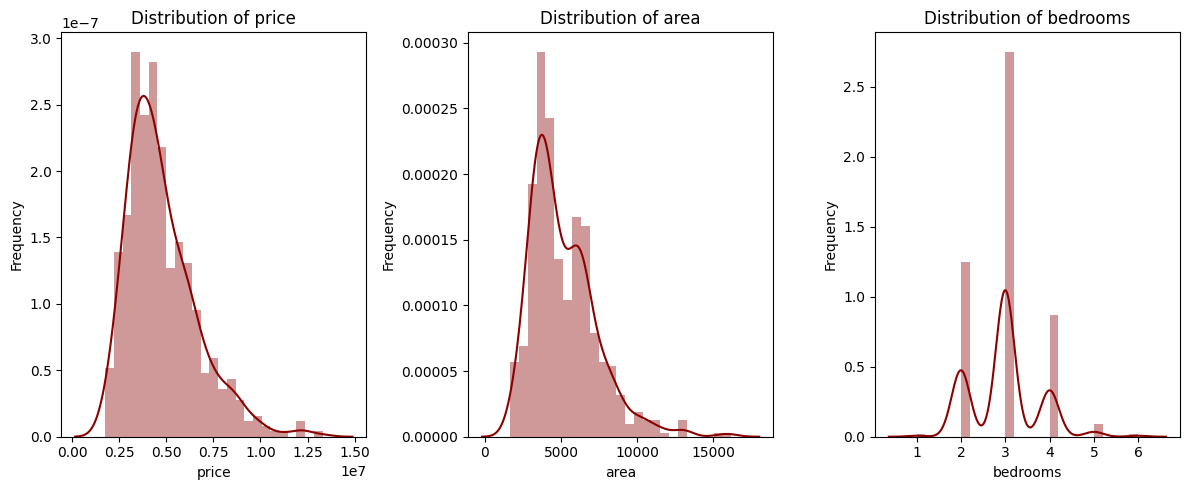

In [6]:
eda_numerical_features = ['price', 'area', 'bedrooms']

plt.figure(figsize=(12, 5))

for i, feature in enumerate(eda_numerical_features):
    plt.subplot(1, 3, i + 1)

    sns.distplot(df[feature], kde=True, bins=25, color='darkred')
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

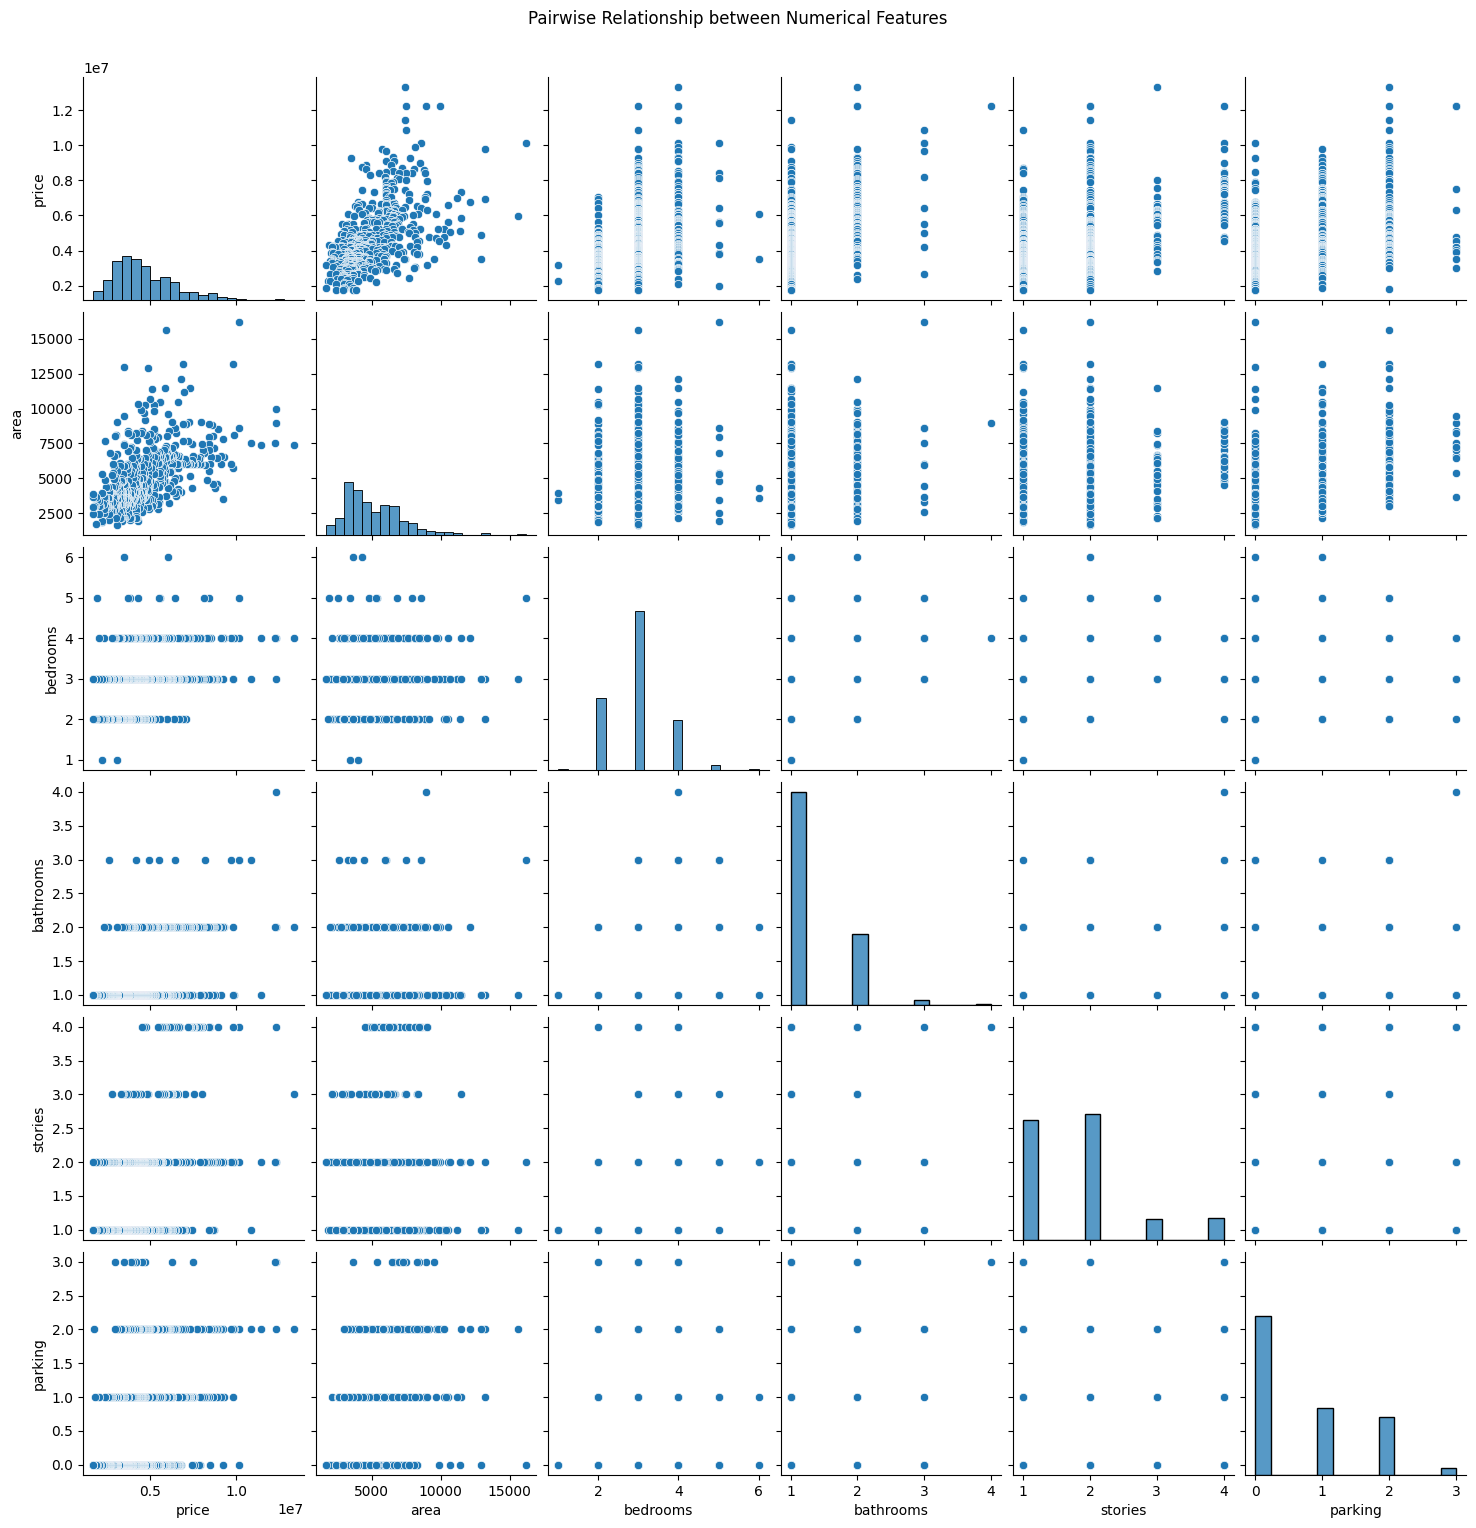

In [7]:
df_numerical = df[numerical_features]

sns.pairplot(df_numerical)
plt.suptitle('Pairwise Relationship between Numerical Features', y=1.02)
plt.show()

# **Part 4**

In [8]:
# 1. Check for the number of duplicate rows
num_duplicates = df.duplicated().sum()

original_shape = df.shape

if num_duplicates > 0:
    df.drop_duplicates(inplace=True)

new_shape = df.shape

print(f"Number of duplicate rows found: {num_duplicates}")
print(f"Dataset shape before removal: {original_shape}")
print(f"Dataset shape after removal: {new_shape}")


Number of duplicate rows found: 0
Dataset shape before removal: (545, 13)
Dataset shape after removal: (545, 13)


In [9]:
# Calculate the number of missing values in each column
missing_values_count = df.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]

if missing_values_count.empty:
    print("No missing values were found in the dataset.")
    remediation_needed = False
else:
    remediation_needed = True
    print("Number of missing values per column:")
    print(missing_values_count.to_markdown())

original_shape = df.shape
if remediation_needed:
    df.dropna(inplace=True)

    print("\nMissing value handling: Rows containing missing values were removed (dropna).")

new_shape = df.shape

print(f"Dataset shape before handling: {original_shape}")
print(f"Dataset shape after handling: {new_shape}")

No missing values were found in the dataset.
Dataset shape before handling: (545, 13)
Dataset shape after handling: (545, 13)


In [10]:
# @title
# Encoding Binary Variables
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Use map to convert 'yes' to 1 and 'no' to 0
df[binary_vars] = df[binary_vars].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# 2. Encoding Multi-Categorical Features (One-Hot Encoding)
furnishing_status_dummies = pd.get_dummies(df['furnishingstatus'], drop_first=True)

df = pd.concat([df, furnishing_status_dummies], axis=1)

df.drop('furnishingstatus', axis=1, inplace=True)

print("First 5 rows of the dataset after encoding:")
print(df.head().to_markdown(index=False))
print(f"\nFinal dataset shape: {df.shape}")
print(f"Data types of new columns: {df.dtypes.tail(3).to_markdown()}")


First 5 rows of the dataset after encoding:
|    price |   area |   bedrooms |   bathrooms |   stories |   mainroad |   guestroom |   basement |   hotwaterheating |   airconditioning |   parking |   prefarea | semi-furnished   | unfurnished   |
|---------:|-------:|-----------:|------------:|----------:|-----------:|------------:|-----------:|------------------:|------------------:|----------:|-----------:|:-----------------|:--------------|
| 13300000 |   7420 |          4 |           2 |         3 |          1 |           0 |          0 |                 0 |                 1 |         2 |          1 | False            | False         |
| 12250000 |   8960 |          4 |           4 |         4 |          1 |           0 |          0 |                 0 |                 1 |         3 |          0 | False            | False         |
| 12250000 |   9960 |          3 |           2 |         2 |          1 |           0 |          1 |                 0 |                 0 |         2 |

In [11]:
# Reload the dataset to start fresh with preprocessing
df = pd.read_csv("Housing.csv")

# Outlier Removal using IQR Method
outlier_features = ['price', 'area']
original_rows = df.shape[0]

for col in outlier_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame: keep rows where the column value is within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

rows_removed = original_rows - df.shape[0]
print(f"Number of rows removed due to outliers: {rows_removed}")
print(f"Dataset shape after outlier removal: {df.shape}")

# 2. Encoding Binary Variables
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Use map to convert 'yes' to 1 and 'no' to 0
df[binary_vars] = df[binary_vars].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# 3. Encoding Multi-Categorical Features (One-Hot Encoding)
furnishing_status_dummies = pd.get_dummies(df['furnishingstatus'], drop_first=True)

df = pd.concat([df, furnishing_status_dummies], axis=1)

df.drop('furnishingstatus', axis=1, inplace=True)


print("\n--- Status of the dataset after encoding and outlier removal ---")
print(f"Final dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset after encoding:")
print(df.head().to_markdown(index=False))

missing_values_final_check = df.isnull().sum()
missing_values_final_check = missing_values_final_check[missing_values_final_check > 0]

if missing_values_final_check.empty:
    print("\nNo missing values were found in the dataset.")
else:
    print("\nNumber of missing values per column after all steps:")
    print(missing_values_final_check.to_markdown())

Number of rows removed due to outliers: 28
Dataset shape after outlier removal: (517, 13)

--- Status of the dataset after encoding and outlier removal ---
Final dataset shape: (517, 14)

First 5 rows of the dataset after encoding:
|   price |   area |   bedrooms |   bathrooms |   stories |   mainroad |   guestroom |   basement |   hotwaterheating |   airconditioning |   parking |   prefarea | semi-furnished   | unfurnished   |
|--------:|-------:|-----------:|------------:|----------:|-----------:|------------:|-----------:|------------------:|------------------:|----------:|-----------:|:-----------------|:--------------|
| 9100000 |   6000 |          4 |           1 |         2 |          1 |           0 |          1 |                 0 |                 0 |         2 |          0 | True             | False         |
| 9100000 |   6600 |          4 |           2 |         2 |          1 |           1 |          1 |                 0 |                 1 |         1 |          1 | Fal

In [12]:
# @title
# Reload the dataset to start fresh with preprocessing
df = pd.read_csv("Housing.csv")

# --- 1. Outlier Removal using IQR Method ---
# Features to check for outliers: price and area (due to strong skewness)
outlier_features = ['price', 'area']
original_rows = df.shape[0]

for col in outlier_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame: keep rows where the column value is within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

rows_removed = original_rows - df.shape[0]
print(f"Number of rows removed due to outliers: {rows_removed}")
print(f"Dataset shape after outlier removal: {df.shape}")

# --- 2. Encoding Binary Variables ---
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Use map to convert 'yes' to 1 and 'no' to 0
df[binary_vars] = df[binary_vars].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# --- 3. Encoding Multi-Categorical Features (One-Hot Encoding) ---
furnishing_status_dummies = pd.get_dummies(df['furnishingstatus'], drop_first=True)

df = pd.concat([df, furnishing_status_dummies], axis=1)

df.drop('furnishingstatus', axis=1, inplace=True)


# --- 4. Report the result ---
print("\n--- Status of the dataset after encoding and outlier removal ---")
print(f"Final dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset after encoding:")
print(df.head().to_markdown(index=False))

# Check for missing values after all steps
missing_values_final_check = df.isnull().sum()
missing_values_final_check = missing_values_final_check[missing_values_final_check > 0]

if missing_values_final_check.empty:
    print("\nNo missing values were found in the dataset.")
else:
    print("\nNumber of missing values per column after all steps:")
    print(missing_values_final_check.to_markdown())

Number of rows removed due to outliers: 28
Dataset shape after outlier removal: (517, 13)

--- Status of the dataset after encoding and outlier removal ---
Final dataset shape: (517, 14)

First 5 rows of the dataset after encoding:
|   price |   area |   bedrooms |   bathrooms |   stories |   mainroad |   guestroom |   basement |   hotwaterheating |   airconditioning |   parking |   prefarea | semi-furnished   | unfurnished   |
|--------:|-------:|-----------:|------------:|----------:|-----------:|------------:|-----------:|------------------:|------------------:|----------:|-----------:|:-----------------|:--------------|
| 9100000 |   6000 |          4 |           1 |         2 |          1 |           0 |          1 |                 0 |                 0 |         2 |          0 | True             | False         |
| 9100000 |   6600 |          4 |           2 |         2 |          1 |           1 |          1 |                 0 |                 1 |         1 |          1 | Fal

In [13]:
# 1. Feature and Target Separation
X = df.drop('price', axis=1)  # All features (n=13)
y = df['price']               # Target variable

# 2. Split the dataset: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=100
)

print("Dataset Status after Train/Test Split ")
print(f"Final shape of X_train (Training feature set): {X_train.shape}")
print(f"Final shape of X_test (Testing feature set): {X_test.shape}")
print(f"Final shape of y_train (Training target set): {y_train.shape}")
print(f"Final shape of y_test (Testing target set): {y_test.shape}")


Dataset Status after Train/Test Split 
Final shape of X_train (Training feature set): (361, 13)
Final shape of X_test (Testing feature set): (156, 13)
Final shape of y_train (Training target set): (361,)
Final shape of y_test (Testing target set): (156,)


In [14]:
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

scaler = MinMaxScaler()

# Fit the scaler ONLY on X_train and transform both X_train and X_test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Convert scaled y back to Series/DataFrame for consistency
y_train_scaled = pd.Series(y_train_scaled.flatten(), name='price', index=y_train.index)
y_test_scaled = pd.Series(y_test_scaled.flatten(), name='price', index=y_test.index)

print("--- Dataset Status after Normalization ---")
print(f"Final shape of X_train: {X_train.shape}")
print(f"Final shape of y_train (scaled): {y_train_scaled.shape}")
print("\nX_train after normalization (first 5 rows):")
print(X_train.head().to_markdown())
print("\ny_train_scaled (first 5 rows):")
print(y_train_scaled.head().to_markdown(floatfmt='.4f'))


--- Dataset Status after Normalization ---
Final shape of X_train: (361, 13)
Final shape of y_train (scaled): (361,)

X_train after normalization (first 5 rows):
|     |     area |   bedrooms |   bathrooms |   stories |   mainroad |   guestroom |   basement |   hotwaterheating |   airconditioning |   parking |   prefarea | semi-furnished   | unfurnished   |
|----:|---------:|-----------:|------------:|----------:|-----------:|------------:|-----------:|------------------:|------------------:|----------:|-----------:|:-----------------|:--------------|
| 148 | 0.526907 |        0.4 |         0   |  0.666667 |          1 |           0 |          0 |                 0 |                 0 |  0        |          1 | True             | False         |
| 236 | 0.114134 |        0.2 |         0   |  0.333333 |          1 |           1 |          1 |                 0 |                 0 |  0        |          1 | True             | False         |
| 356 | 0.072738 |        0.8 |         0.5 | 

# **Part 5**

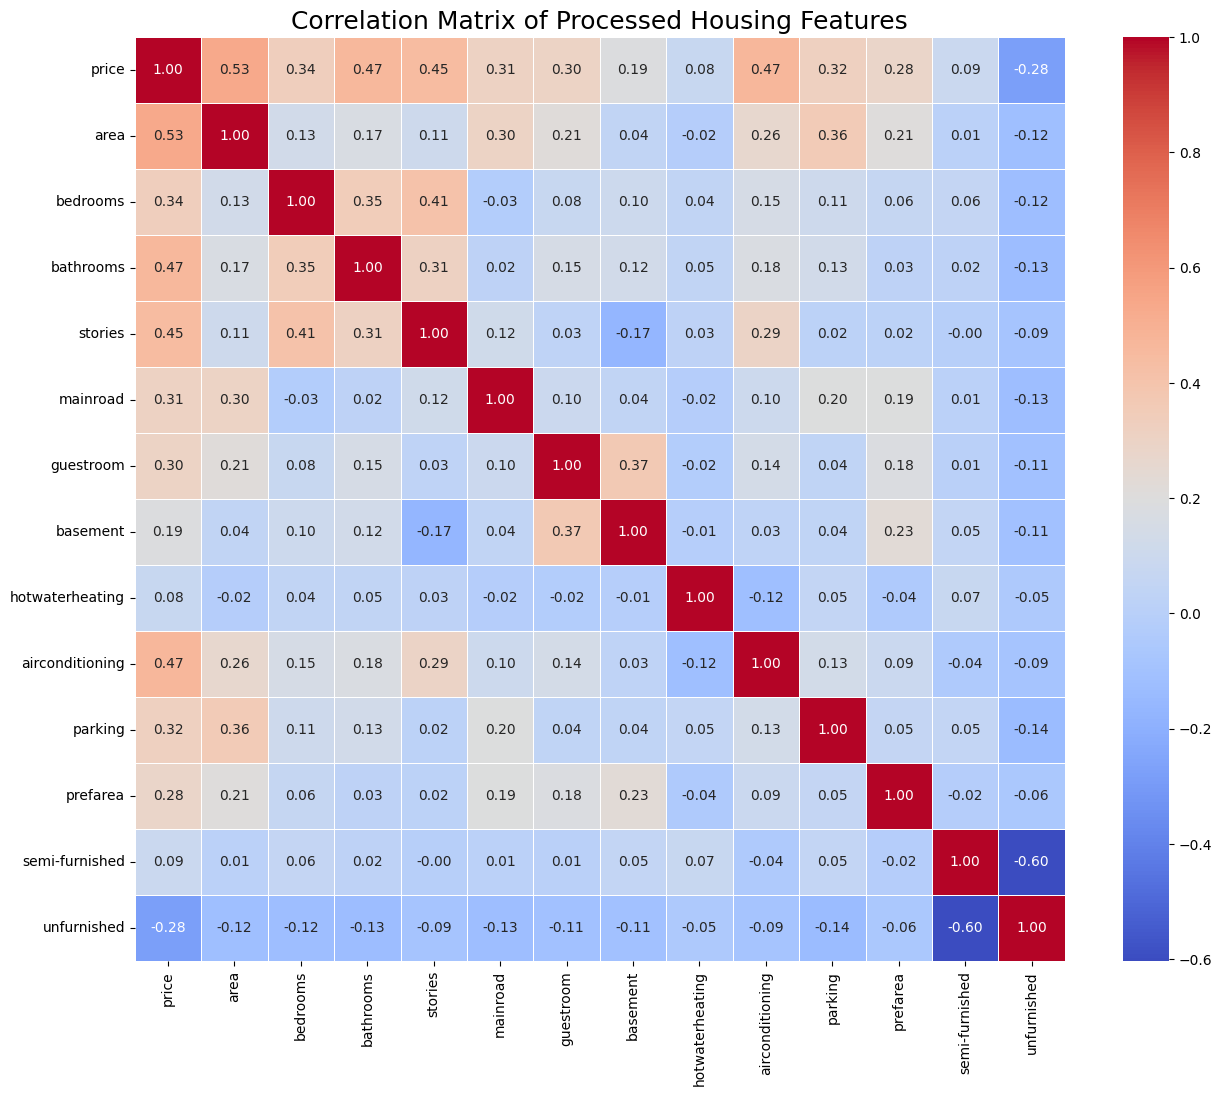

In [15]:
# Calculate the correlation matrix
correlations = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Correlation Matrix of Processed Housing Features', fontsize=18)
plt.show()


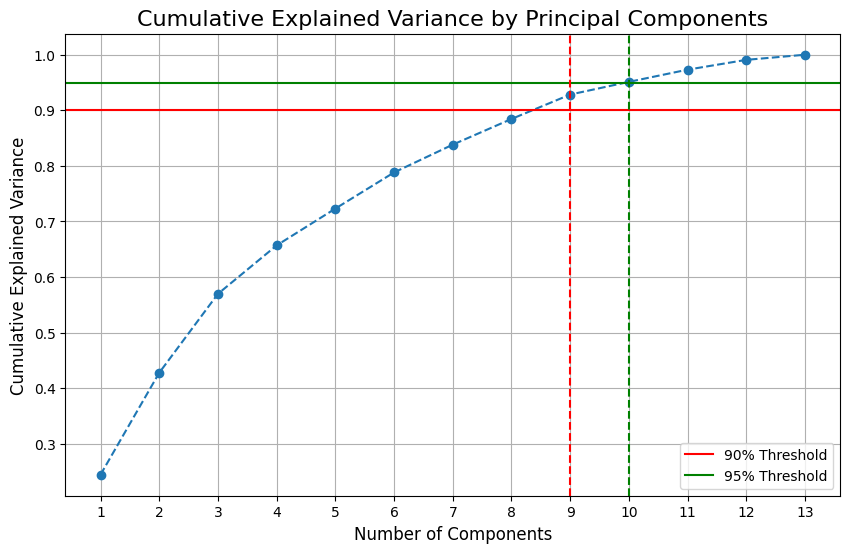

PCA Cumulative Variance Analysis
Total number of principal components: 13
Number of components needed to retain 90% variance: 9
Number of components needed to retain 95% variance: 10


In [16]:
from sklearn.decomposition import PCA
import numpy as np

# Initialize PCA with the number of components equal to the total number of features in X_train
pca = PCA(n_components=X_train.shape[1])

# Fit PCA on the scaled training dataset
pca.fit(X_train)


# Analyze and Plot Cumulative Explained Variance (CEV)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components required to retain 90% and 95% of the total variance
components_for_90 = np.argmax(cumulative_variance >= 0.90) + 1
components_for_95 = np.argmax(cumulative_variance >= 0.95) + 1


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
         marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Threshold')
plt.axhline(y=0.95, color='g', linestyle='-', label='95% Threshold')
plt.axvline(x=components_for_90, color='r', linestyle='--')
plt.axvline(x=components_for_95, color='g', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components', fontsize=16)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.xticks(np.arange(1, X_train.shape[1] + 1, step=1))
plt.legend()
plt.grid(True)
plt.show()

print("PCA Cumulative Variance Analysis")
print(f"Total number of principal components: {X_train.shape[1]}")
print(f"Number of components needed to retain 90% variance: {components_for_90}")
print(f"Number of components needed to retain 95% variance: {components_for_95}")


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_vif = X_train.copy()

def calculate_vif(df):

    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns

    df_vif_const = df.assign(const=1).astype(float)

    # Calculate VIF for each feature (excluding the 'const' column)
    vif_data["VIF"] = [
        variance_inflation_factor(df_vif_const.values, i)
        for i in range(df_vif_const.shape[1] - 1)
    ]

    return vif_data.sort_values(by="VIF", ascending=False)

vif_df = calculate_vif(X_train_vif)

while (vif_df['VIF'].max() > 5):
    feature_to_drop = vif_df.iloc[0]['Feature']
    X_train_vif.drop(columns=[feature_to_drop], inplace=True)
    vif_df = calculate_vif(X_train_vif)


print("VIF Analysis and Multicollinearity Removal")
print("Features were iteratively removed until all VIF values were below 5.")
print(f"Final number of features: {X_train_vif.shape[1]} (from 13 original features)")
print("\nFinal VIF Table:")
print(vif_df.to_markdown(floatfmt='.2f'))


VIF Analysis and Multicollinearity Removal
Features were iteratively removed until all VIF values were below 5.
Final number of features: 13 (from 13 original features)

Final VIF Table:
|    | Feature         |   VIF |
|---:|:----------------|------:|
| 12 | unfurnished     |  1.79 |
| 11 | semi-furnished  |  1.72 |
|  3 | stories         |  1.50 |
|  1 | bedrooms        |  1.35 |
|  0 | area            |  1.34 |
|  6 | basement        |  1.33 |
|  5 | guestroom       |  1.26 |
|  8 | airconditioning |  1.25 |
|  2 | bathrooms       |  1.23 |
|  9 | parking         |  1.19 |
| 10 | prefarea        |  1.18 |
|  4 | mainroad        |  1.14 |
|  7 | hotwaterheating |  1.04 |


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=8)

rfe.fit(X_train, y_train)

rfe_results = pd.DataFrame({
    'Features': X_train.columns,
    'RFE_Support': rfe.support_,
    'Ranking': rfe.ranking_
})

# Select only the features chosen by RFE
selected_features_rfe = rfe_results[rfe_results['RFE_Support'] == True]['Features'].tolist()

print("RFE Analysis and Feature Selection")
print(f"Number of selected features: {len(selected_features_rfe)}")
print("\nSelected Features (based on RFE):")
print(selected_features_rfe)
print("\nRFE Feature Ranking Table:")
print(rfe_results.sort_values(by='Ranking').to_markdown(index=False))


RFE Analysis and Feature Selection
Number of selected features: 8

Selected Features (based on RFE):
['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'unfurnished']

RFE Feature Ranking Table:
| Features        | RFE_Support   |   Ranking |
|:----------------|:--------------|----------:|
| area            | True          |         1 |
| bathrooms       | True          |         1 |
| stories         | True          |         1 |
| hotwaterheating | True          |         1 |
| unfurnished     | True          |         1 |
| prefarea        | True          |         1 |
| parking         | True          |         1 |
| airconditioning | True          |         1 |
| basement        | False         |         2 |
| mainroad        | False         |         3 |
| guestroom       | False         |         4 |
| bedrooms        | False         |         5 |
| semi-furnished  | False         |         6 |


# **Part 6**

In [19]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Apply PCA and Train Linear Regression Model
pca_final = PCA(n_components=10)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

y_pred_train_lr_pca = lr_pca.predict(X_train_pca)
y_pred_test_lr_pca = lr_pca.predict(X_test_pca)

mse_test = mean_squared_error(y_test, y_pred_test_lr_pca)
mae_test = mean_absolute_error(y_test, y_pred_test_lr_pca)
r2_test = r2_score(y_test, y_pred_test_lr_pca)

r2_train = r2_score(y_train, y_pred_train_lr_pca)

print("Comprehensive Evaluation of Linear Regression Model with PCA ")

print("\nTest Set Performance Metrics")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:,.2f}")



Comprehensive Evaluation of Linear Regression Model with PCA 

Test Set Performance Metrics
R-squared (R²): 0.6725
Mean Absolute Error (MAE): 718,114.30


In [20]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-4, 0, 10)

ridge_pca = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_absolute_error')

# Train the Ridge Regression model on PCA-transformed data
ridge_pca.fit(X_train_pca, y_train)

y_pred_train_ridge_pca = ridge_pca.predict(X_train_pca)
r2_train_ridge_pca = r2_score(y_train, y_pred_train_ridge_pca)

y_pred_test_ridge_pca = ridge_pca.predict(X_test_pca)
r2_test_ridge_pca = r2_score(y_test, y_pred_test_ridge_pca)
mae_test_ridge_pca = mean_absolute_error(y_test, y_pred_test_ridge_pca)

print("Evaluation of Ridge Regression Model with PCA ")
print(f"Optimal Alpha Selected via Cross-Validation: {ridge_pca.alpha_:.4f}")
print(f"\nR-squared (R²) on Training Set: {r2_train_ridge_pca:.4f}")
print(f"R-squared (R²) on Test Set: {r2_test_ridge_pca:.4f}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test_ridge_pca:,.2f}")


Evaluation of Ridge Regression Model with PCA 
Optimal Alpha Selected via Cross-Validation: 1.0000

R-squared (R²) on Training Set: 0.6083
R-squared (R²) on Test Set: 0.6696
Mean Absolute Error (MAE) on Test Set: 720,808.71


In [21]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, 0, 100)

# LassoCV automatically selects the optimal alpha using cross-validation.
lasso_pca = LassoCV(alphas=alphas, cv=5, random_state=100, max_iter=10000)

lasso_pca.fit(X_train_pca, y_train)

y_pred_train_lasso_pca = lasso_pca.predict(X_train_pca)
r2_train_lasso_pca = r2_score(y_train, y_pred_train_lasso_pca)
y_pred_test_lasso_pca = lasso_pca.predict(X_test_pca)
r2_test_lasso_pca = r2_score(y_test, y_pred_test_lasso_pca)
mae_test_lasso_pca = mean_absolute_error(y_test, y_pred_test_lasso_pca)

print("Evaluation of Lasso Regression Model with PCA")
print(f"Optimal Alpha Selected via Cross-Validation: {lasso_pca.alpha_:.4f}")
print(f"\nR-squared (R²) on Training Set: {r2_train_lasso_pca:.4f}")
print(f"R-squared (R²) on Test Set: {r2_test_lasso_pca:.4f}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test_lasso_pca:,.2f}")


Evaluation of Lasso Regression Model with PCA
Optimal Alpha Selected via Cross-Validation: 0.9112

R-squared (R²) on Training Set: 0.6085
R-squared (R²) on Test Set: 0.6725
Mean Absolute Error (MAE) on Test Set: 718,115.48


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

pca = PCA(n_components=0.95, random_state=100)
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)


model_poly_pca = LinearRegression()
model_poly_pca.fit(X_train_pca, y_train)

y_pred_train = model_poly_pca.predict(X_train_pca)
y_pred_test = model_poly_pca.predict(X_test_pca)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Polynomial Regression and PCA")
print(f"R² (Train): {r2_train:.4f}")
print(f"R² (Test):  {r2_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:,.2f}")


Polynomial Regression and PCA
R² (Train): 0.6740
R² (Test):  0.6441
Mean Absolute Error (MAE): 763,533.03


In [23]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

pca = PCA(n_components=0.95, random_state=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

mlp_pca = MLPRegressor(
    hidden_layer_sizes=(256, 128,64,32 ),
    activation='tanh',
    solver='adam',
    learning_rate_init=1e-4,
    max_iter=5000,
    early_stopping=True,
    validation_fraction=0.15,
    random_state=42,
    verbose=False
)

mlp_pca.fit(X_train_pca, y_train_scaled)

y_pred_scaled = mlp_pca.predict(X_test_pca)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print("\nMLP Regressor with PCA")
print(f"R² (Test):  {r2_test:.4f}")
print(f"MAE: {mae_test:,.2f}")



MLP Regressor with PCA
R² (Test):  0.6741
MAE: 718,034.74


In [24]:
from sklearn.linear_model import ElasticNetCV


elastic = ElasticNetCV(
    l1_ratio=np.linspace(0.05, 0.95, 20),
    alphas=np.logspace(-4, 2, 100),
    cv=10,
    max_iter=20000,
    random_state=42

)

elastic.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = elastic.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print("Elastic Net Regression")
print(f"Optimal α: {elastic.alpha_:.5f}")
print(f"Optimal L1 Ratio: {elastic.l1_ratio_:.2f}")
print(f"R² (Test):  {r2_test:.4f}")
print(f"MAE: {mae_test:,.2f}")

Elastic Net Regression
Optimal α: 0.01748
Optimal L1 Ratio: 0.95
R² (Test):  0.6500
MAE: 743,297.42


In [26]:
!pip install tensorflow

In [35]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


# Create a 4-Class Target for MLP Training
bins = y_train.quantile([0.25, 0.5, 0.75]).tolist()
bins = [y_train.min()] + bins + [y_train.max()]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True, duplicates='drop')

le = LabelEncoder()
y_train_classified = le.fit_transform(y_train_binned.astype(str))


# Feature Extraction Function & MLP Training

def extract_features(mlp_model, X_data, layer_index=-2):
    """Function to extract the output of the last hidden layer"""
    current_output = X_data.values
    for i in range(len(mlp_model.coefs_) + layer_index):
        z = current_output @ mlp_model.coefs_[i] + mlp_model.intercepts_[i]
        current_output = np.maximum(0, z)  # ReLU activation
    return current_output

# Initialize and train the MLP model for feature extraction
mlp_feature_extractor = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=1e-2,
    max_iter=2000,
    early_stopping=True,
    random_state=42,
)
mlp_feature_extractor.fit(X_train, y_train_classified)


# Extract high-level features from the trained MLP model
X_train_features = extract_features(mlp_feature_extractor, X_train)
X_test_features = extract_features(mlp_feature_extractor, X_test)


# Evaluate Regression Models on Extracted Features
results = {}

# Helper function to train, evaluate, and store model results
def evaluate_model(model, X_train_f, X_test_f, model_name):
    model.fit(X_train_f, y_train)
    y_pred_test = model.predict(X_test_f)
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    results[model_name] = {'R2': r2, 'MAE': mae}

evaluate_model(LinearRegression(), X_train_features, X_test_features, 'Multiple Linear Regression')
evaluate_model(RidgeCV(alphas=np.logspace(-4, 0, 100), cv=5), X_train_features, X_test_features, 'Ridge')
evaluate_model(LassoCV(alphas=np.logspace(-4, 0, 100), cv=5, random_state=100), X_train_features, X_test_features, 'Lasso')

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_features)
X_test_poly = poly.transform(X_test_features)
evaluate_model(LinearRegression(), X_train_poly, X_test_poly, 'Polynomial')

comparison_df = pd.DataFrame(results).T.reset_index()
comparison_df.columns = ['Model', "R²", 'MAE']

print("Final Regression Results on MLP-Extracted Features")
print(comparison_df.sort_values(by='MAE').to_markdown(index=False, floatfmt=".4f"))


Final Regression Results on MLP-Extracted Features
| Model                      |             R² |             MAE |
|:---------------------------|---------------:|----------------:|
| Ridge                      |         0.6499 |     749046.7714 |
| Multiple Linear Regression |         0.6465 |     779199.9140 |
| Lasso                      |         0.6351 |     786037.7420 |
| Polynomial                 | -30895983.3720 | 5359495324.4115 |
